## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

from PIL import Image

def detect_faces(img):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    if len(faces_detected) > 0:
        (x, y, w, h) = faces_detected[0]
        #print(len(faces_detected))

        #img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

        p=3 #padding, margem
        img = img[y-p+1:y+h+p, x-p+1:x+w+p]

        #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #plt.imshow(img_rgb, cmap='gray')
        #plt.show()
        return img, True
    else:
        #print("Nenhuma face detectada")
        return img, False
    #return img

def top_hat(img):

    filterSize = (10, 10)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

    # Reading the image named 'input.jpg'
    input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Applying the Black-Hat operation
    tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_BLACKHAT, kernel)

    return tophat_img

In [13]:
import cv2
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import os
import cvzone

# ler um arquivo de vídeo
#cap = cv2.VideoCapture('videos/jeronimo2.mp4')

# grava em tempo real
#cap = cv2.VideoCapture(0)

def backgorund_remover(img):

    segmentor = SelfiSegmentation()
    imgOut = segmentor.removeBG(img, (255, 255, 255), threshold=0.83)
    return imgOut

In [14]:
#DATADIR = "../bases/dados/imagens/mnist/train"
DATADIR = "../../../_DATA_/image/frames-pulando/teste"

DATADIR = pathlib.Path(DATADIR)

#IMG_SIZE = 28#'original'#Tamanho mxm e original
IMG_SIZE = 300#'original'#Tamanho mxm e original

formato = 'jpg'

#nome_saida = "mnist-train-2"
nome_saida = "faces-teste-300x300"

#local_saida = "../bases/pickle/imagens/mnist/"
local_saida = "../../../_DATA_/image/pickle/"

In [15]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['Diego', 'Erick', 'Jeronimo', 'Pedro', 'Walter']


In [16]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  950


In [17]:
sim = 0
nao = 0

def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    
    global sim
    global nao
    
    
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)#############

        for img in tqdm(os.listdir(path)):

            #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_COLOR)
                       
            #******************APLICAR PRE-PROCESSAMENTO***************
            
            #img_array = backgorund_remover(img_array)
            
            #img_array, k = detect_faces(img_array)
            
            #if k:
            #    sim += 1
            
            #else:
            #    nao += 1
            

            if IMG_SIZE == 'original':
                pass
            else:
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
         
            #img_array = top_hat(img_array)

            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            data.append([img_array, class_num, category])
            #i=i+1
            #if i >= 100:
            #    break

        plt.figure(figsize=(1,1))
        plt.imshow(img_array, cmap='gray')
        plt.show()
    return data

100%|██████████| 190/190 [00:07<00:00, 24.75it/s]


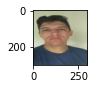

100%|██████████| 190/190 [00:05<00:00, 31.95it/s]


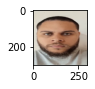

100%|██████████| 190/190 [00:10<00:00, 18.90it/s]


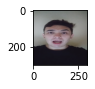

100%|██████████| 190/190 [00:10<00:00, 18.85it/s]


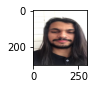

100%|██████████| 190/190 [00:08<00:00, 21.75it/s]


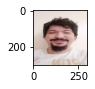

Number of images:  950


In [18]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

In [19]:
print(sim)
print(nao)

0
0


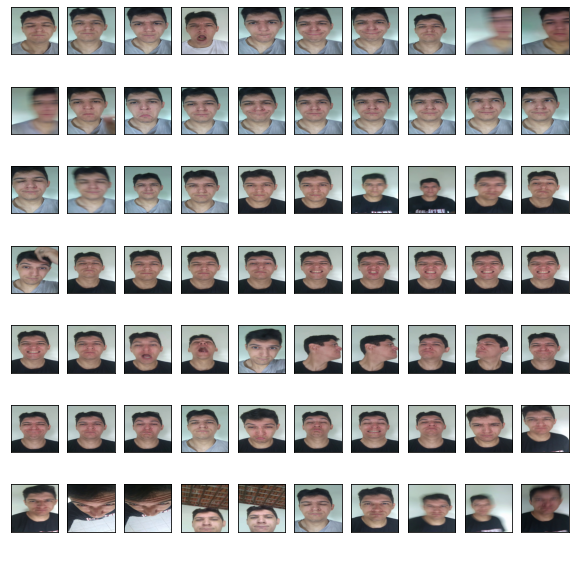

In [20]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')    
plt.show()

In [21]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [22]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../../../_DATA_/image/pickle/faces-teste-300x300-pickle.pickle
